## HELP International - Clustering Countries
- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

### Objective : 
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you suggest the countries which the CEO needs to focus on the most.

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
country = pd.read_csv('Country-data.csv')
country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.shape

(167, 10)

In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Data Cleaning and Preperation

In [6]:
# Check for null values
round(100*(country.isnull().sum()/len(country.index)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- Null values are not present in the data

In [7]:
# Convert health, exports and imports into actual value 
country['exports'] = (country['exports']*country['gdpp']/100).astype('int')
country['health']  = (country['health']*country['gdpp']/100).astype('int')
country['imports'] = (country['imports']*country['gdpp']/100).astype('int')

In [8]:
country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55,41,248,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145,267,1987,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712,185,1400,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199,100,1514,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551,735,7185,19100,1.44,76.8,2.13,12200


In [18]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.185629,1056.209581,6587.892216,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.945373,1801.434338,14710.874894,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000,12.000000,0.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.000000,78.000000,640.000000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.000000,321.000000,2045.000000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7277.500000,976.500000,7719.500000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.000000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Exploratory Data Analysis

In [10]:
## Check for features 
features = country.columns[1:]
list(enumerate(features))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

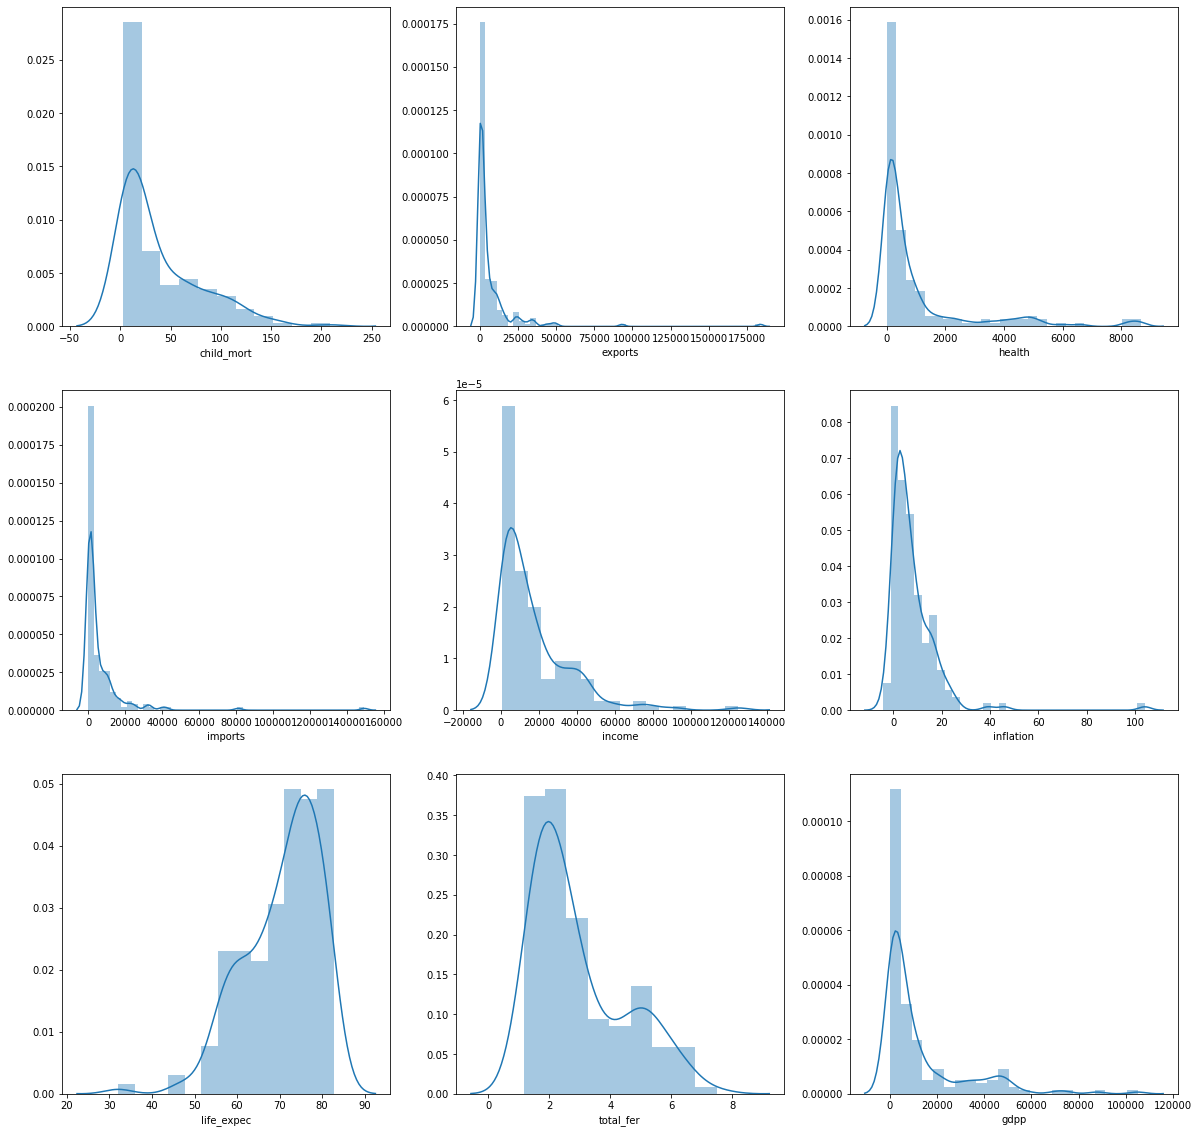

In [13]:
# Performing uni-variate Analysis 
plt.figure(figsize=(20,20))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(country[i[1]])

- Performing distplot to understand the distribution of data. It is clear that all columns are normally distributed

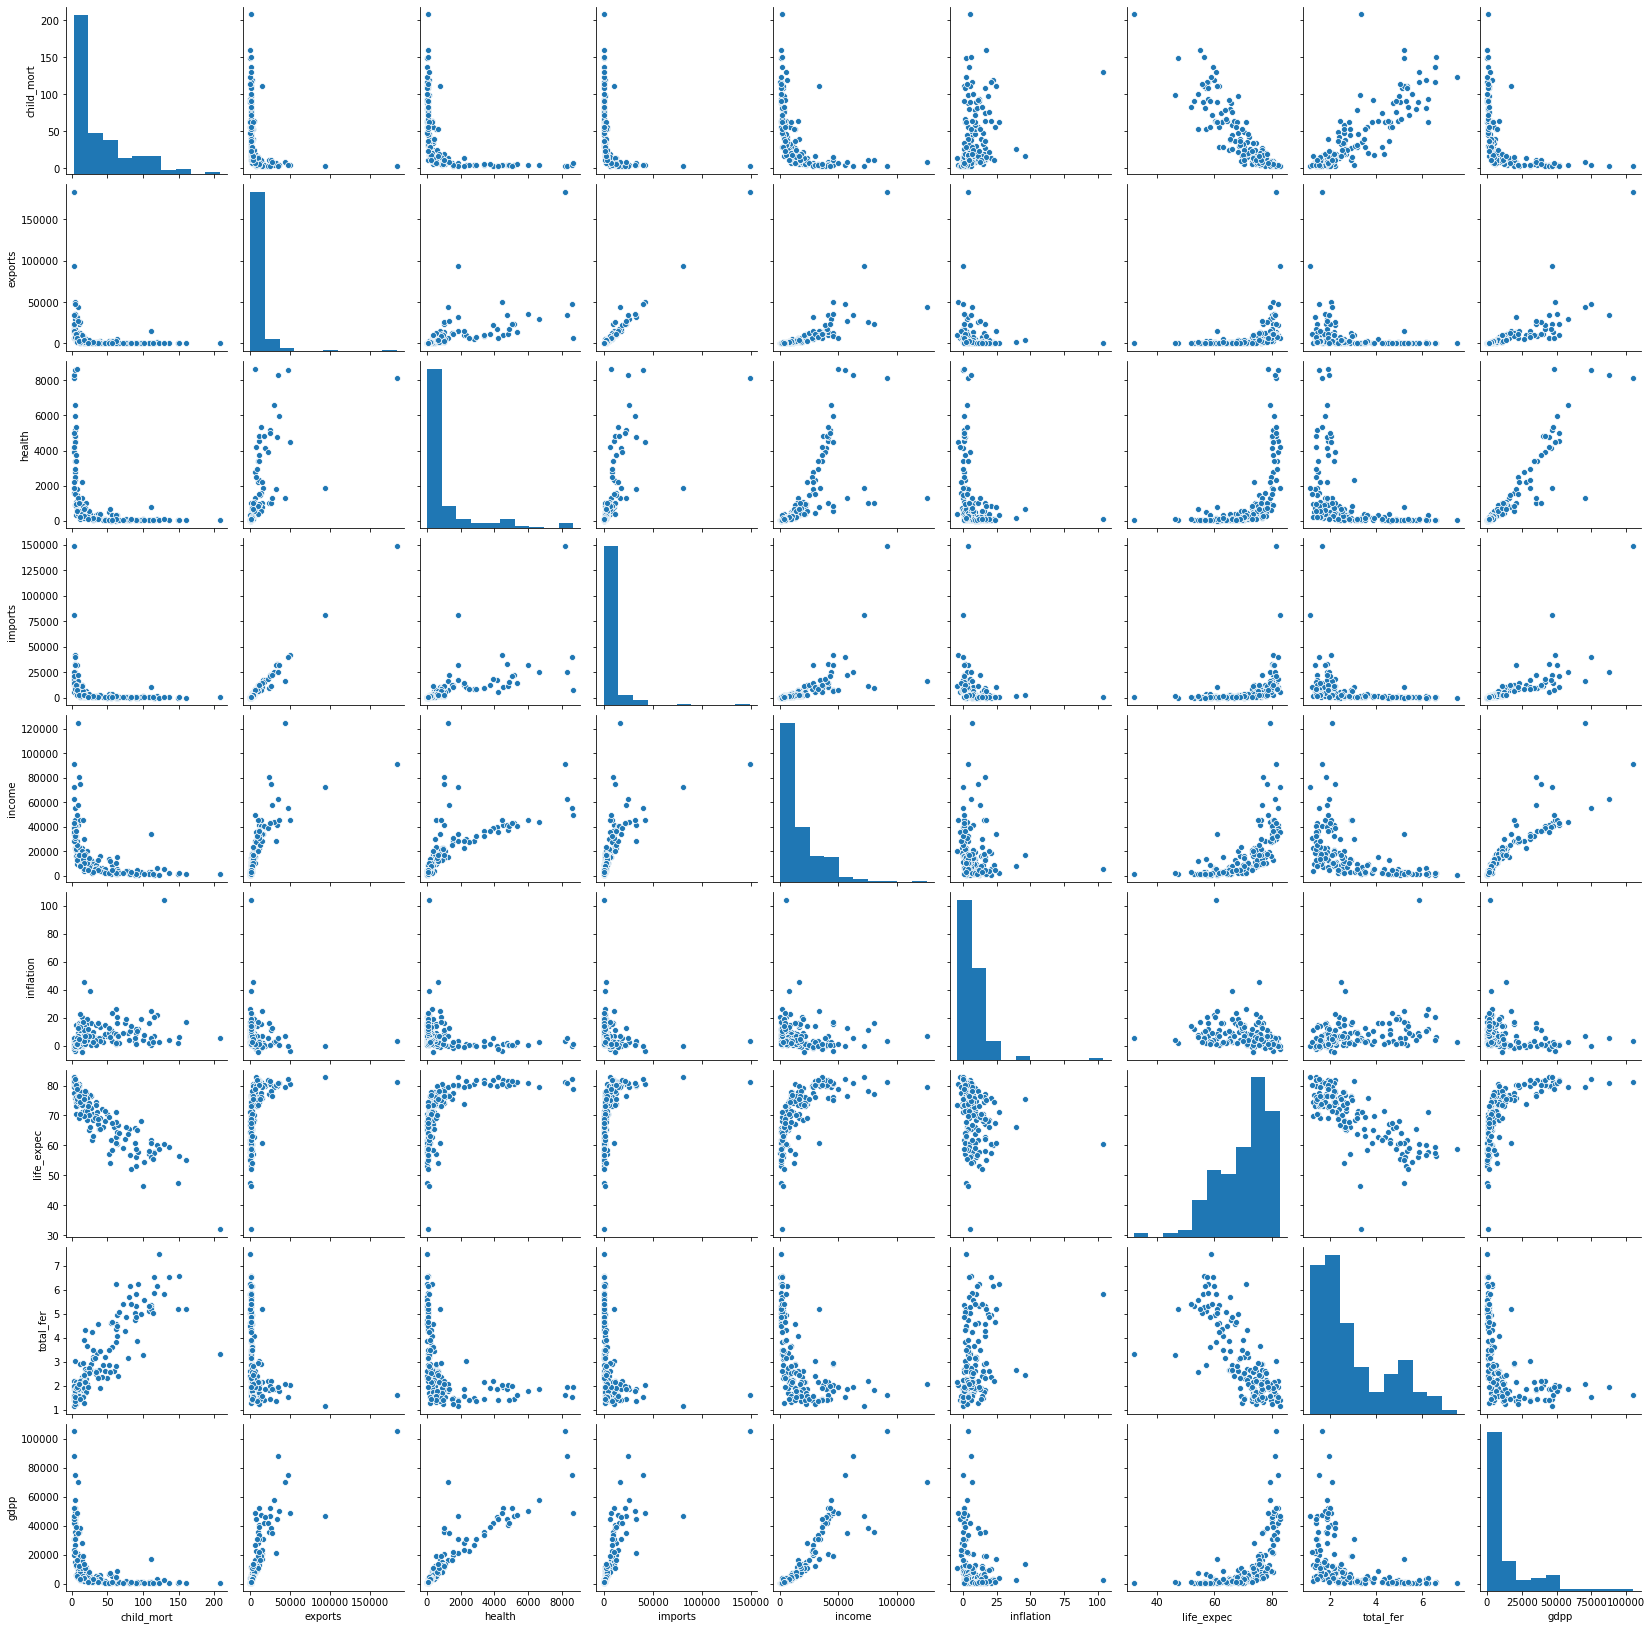

In [17]:
# Visualizing data 
sns.pairplot(country)
plt.show()

## Outlier Analysis

In [19]:
# Understanding Outliers 
country.describe([.25,.5,.75,.9,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.185629,1056.209581,6587.892216,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.945373,1801.434338,14710.874894,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000,12.000000,0.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.000000,78.000000,640.000000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.000000,321.000000,2045.000000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7277.500000,976.500000,7719.500000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.200000,3824.600000,15033.600000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.300000,24241.500000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.040000,55371.060000,84374.000000,41.478000,82.370000,6.563600,79088.000000


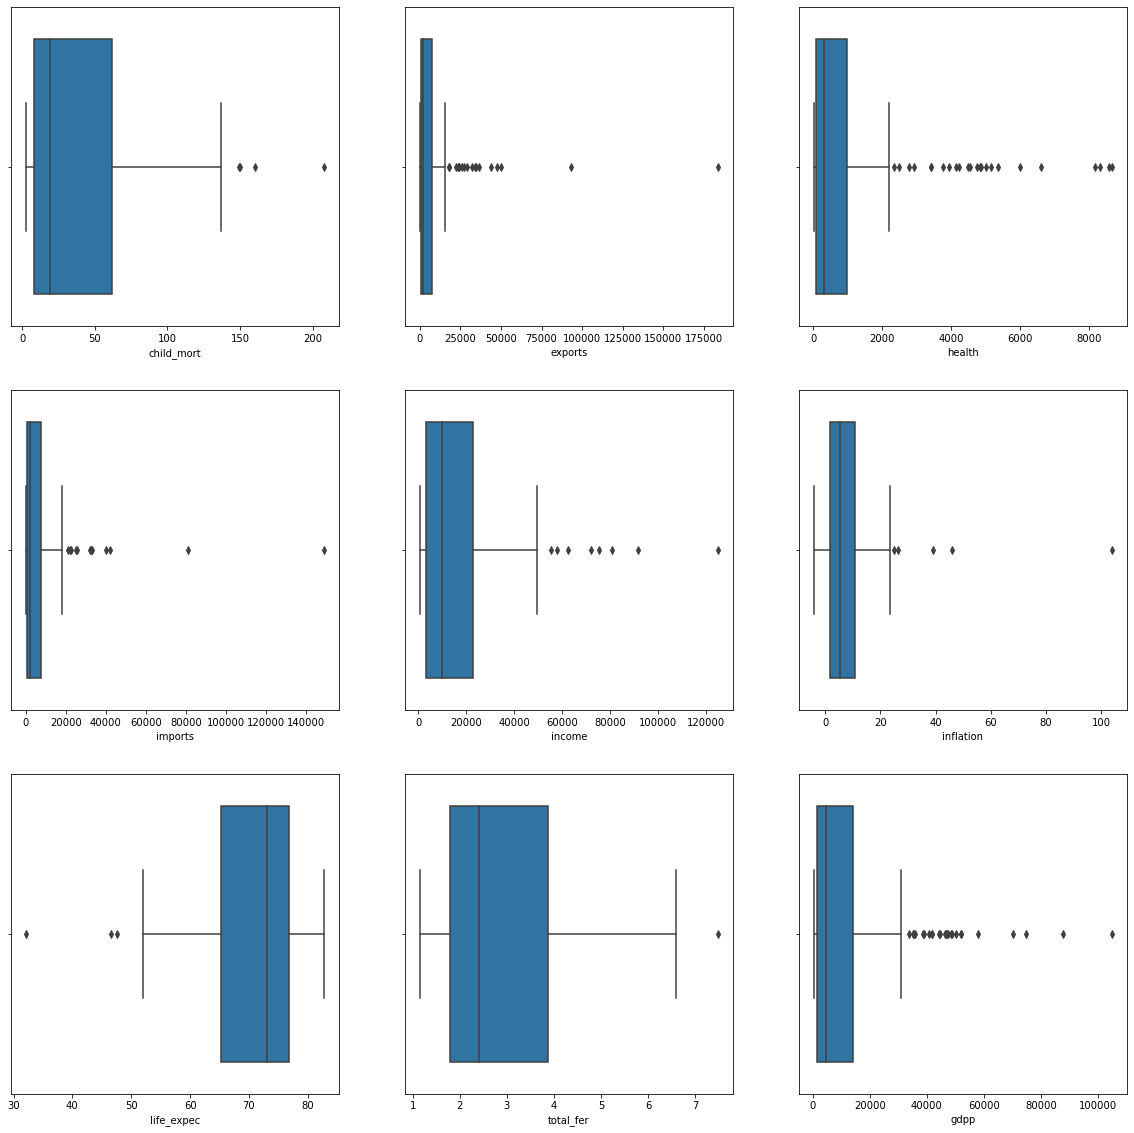

In [14]:
# Checking Ouliers 
plt.figure(figsize=(20,20))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

**From the above plots, I conclude**: 
    - All the columns in the dataset has atleast one outlier in it 
    - Child mortaility, Income, Health, gdpp has more outliers but it is not a good option to remove them, since data is less
    - Total no of countries is 167, removing every outliers would cause more data loss even that would possibly direct our analysis in an uncertain way
    - In case of child_mortality, removing outlier may lead to removing the countries with high child_mortality. But those are the countries which should be focused as per Helps International 
    - In case of life_expec, lower outlier removal can cause countries which has low life_expectancy to be removed
    
    - After analysing and understanding all these, I strongly believe `Removing Outliers is not a good option` hence keeping all the data for further analysis

## Hopkins Statistic

In [20]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(country.drop('country',axis = 1))

0.9268429973427356

- Hopkins value is greater than 0.92, Hence we can proceed with clustering

In [22]:
country_df = country.drop('country', axis= 1)

In [23]:
# Perform Scaling on the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
country_df = scaler.fit_transform(country_df)

In [27]:
country_df = pd.DataFrame(country_df)
country_df.columns = country.columns[1:]
country_df.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411003,-0.565251,-0.432263,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350177,-0.439418,-0.313695,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318536,-0.485074,-0.353718,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291360,-0.532401,-0.345945,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104307,-0.178844,0.040712,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## KMeans Algorithm

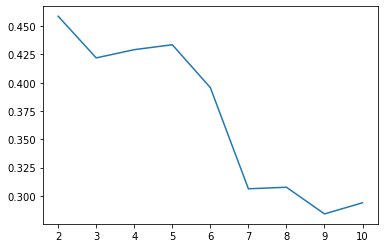

In [34]:
# Let's find out the value of K
# Silhouette Score
# Elbow Curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(country_df)
    ss.append([k, silhouette_score(country_df, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

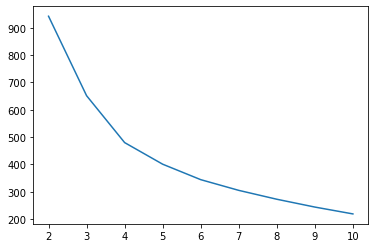

In [36]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

 - Looking at elbow curve/silhoutte curve, we can choose k=3 for clusters 

### Run K-Means with chosen k = 3

In [37]:
# K=3
kmean = KMeans(n_clusters = 3, random_state = 101)
kmean.fit(country_df)

KMeans(n_clusters=3, random_state=101)

In [38]:
cluster = pd.DataFrame(kmean.labels_, columns=['Cluster'])

In [40]:
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [42]:
# Copying the data to new df and adding cluster details
df_country = country.copy()
df_country = pd.concat([df_country,cluster],axis=1)
df_country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,55,41,248,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145,267,1987,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712,185,1400,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199,100,1514,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551,735,7185,19100,1.44,76.8,2.13,12200,2


### Visualizing Clusters 

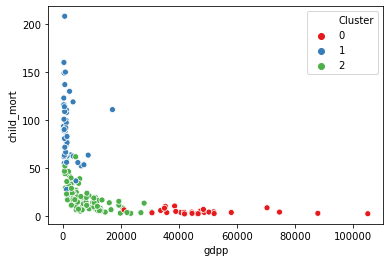

In [43]:
# Visualize Cluster using gdpp and child_mort
sns.scatterplot(x='gdpp', y='child_mort',hue='Cluster',data=df_country, palette='Set1')
plt.show()

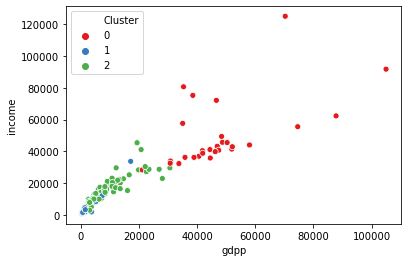

In [44]:
# Visualize Cluster using gdpp and income
sns.scatterplot(x='gdpp', y='income',hue='Cluster',data=df_country, palette='Set1')
plt.show()

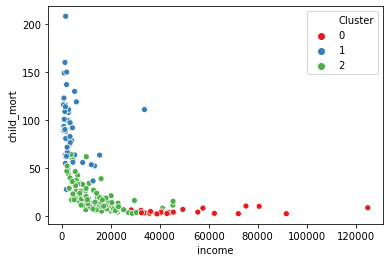

In [45]:
# Visualize Cluster using income and child_mort
sns.scatterplot(x='income', y='child_mort',hue='Cluster',data=df_country, palette='Set1')
plt.show()

### Cluster Profiling

In [47]:
## Cluster Profiling
df_country.drop('country', axis=1).groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,5.046429,31037.892857,4326.678571,25817.785714,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,91.610417,878.625000,114.250000,826.500000,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,20.357143,3603.692308,546.769231,3709.978022,13968.021978,7.070549,73.460440,2.235055,7979.912088


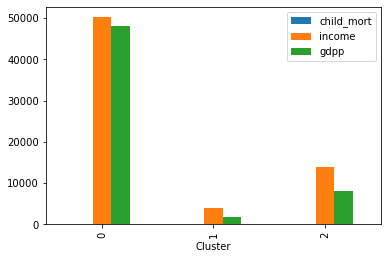

In [55]:
## Only using CHILD_MORT, INCOME, GDPP
df_country.drop(['country', 'exports', 'health','imports', 'inflation', 'life_expec','total_fer'],axis = 1).groupby('Cluster').mean().plot(kind = 'bar')
plt.show()